In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('F:\\Data Science & Machine Learning\\heart failure.csv')

In [3]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [4]:
df.shape

(299, 13)

In [5]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [6]:
df.nunique()

age                          47
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        148
DEATH_EVENT                   2
dtype: int64

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='diabetes', ylabel='count'>

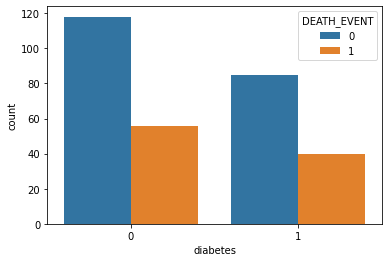

In [8]:
sns.countplot(x='diabetes',hue='DEATH_EVENT',data=df)

<AxesSubplot:xlabel='age', ylabel='count'>

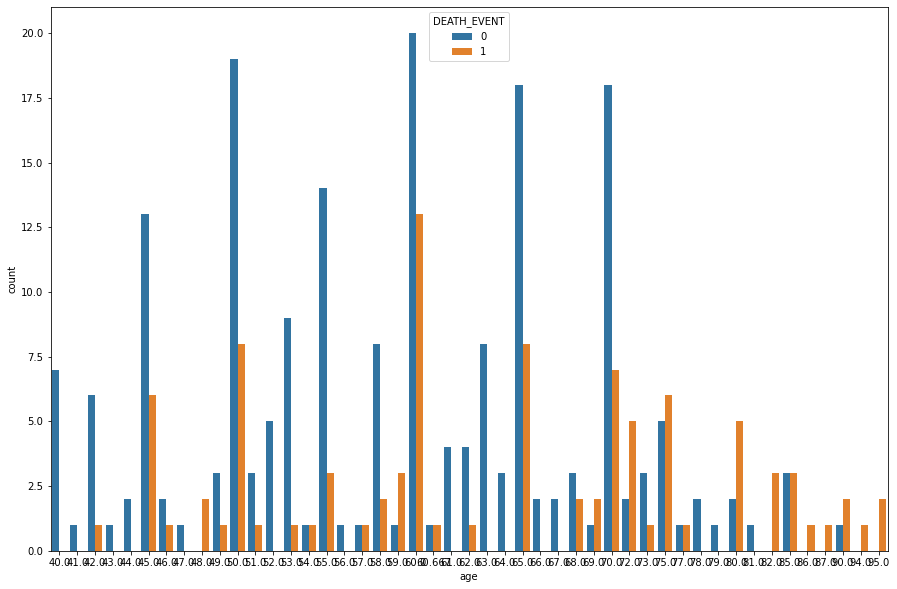

In [9]:
plt.figure(figsize=(15,10))
sns.countplot(x='age',hue='DEATH_EVENT',data=df)

In [10]:
x=df.drop('DEATH_EVENT',axis=1)
y=df[['DEATH_EVENT']]

In [11]:
y

,DEATH_EVENT
0,1
1,1
2,1
3,1
4,1
...,...
294,0
295,0
296,0
297,0


# Train & Test

In [12]:
from sklearn.model_selection import train_test_split as ts           
xtrain,xtest,ytrain,ytest=ts(x,y,train_size=0.70,random_state=1)


In [13]:
xtrain
ytrain

,DEATH_EVENT
14,0
210,0
236,0
44,1
163,1
...,...
203,0
255,0
72,1
235,0


# Fit Data To Decision Tree

In [14]:
from sklearn import tree   
clf=tree.DecisionTreeClassifier()
clf.fit(xtrain,ytrain)


DecisionTreeClassifier()

In [15]:
pred_y=clf.predict(xtest)
pred_y

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1], dtype=int64)

In [16]:
import numpy as np
np.array(ytest)

array([[0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
    

# confusion_matrix

In [20]:
from sklearn.metrics import confusion_matrix as cm
cm(ytest, pred_y)


array([[57,  7],
       [10, 16]], dtype=int64)

In [21]:
tp,fn,fp,tn=cm(ytest, pred_y).reshape(-1)

In [22]:
tp

57

In [23]:
tn

16

In [24]:
fp

10

In [25]:
fn

7

# Accuracy of The Model

In [40]:
model_accuracy=metrics.accuracy_score(ytest,pred_y)
model_accuracy

0.8111111111111111

In [41]:
Manual_accuracy=(tp+tn)/(tp+tn+fp+fn)
Manual_accuracy

0.8111111111111111

# balanced_accuracy_score

In [59]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(ytest, pred_y)

0.7530048076923077

# Precision or Positive Predicted value PPV

In [42]:
import sklearn
Precision=metrics.precision_score(ytest,pred_y,pos_label=1)
Precision


0.6956521739130435

In [43]:
ppv=tp/(tp+fp)
ppv

0.8507462686567164

# Sensivity, Recall, Hit rate, True posivite rate TPR

In [44]:
Recall_score=metrics.recall_score(ytest,pred_y)
Recall_score

0.6153846153846154

In [45]:
tpr=tp/(tp+fn)
tpr

0.890625

# True Negative Rate or Specificity

In [46]:
Specificity=metrics.recall_score(ytest,pred_y,pos_label=1)
Specificity

0.6153846153846154

In [47]:
spec=tn/(tn+fp)
spec

0.6153846153846154

# False Positive Rate or 1-specificity  

In [48]:
FPR=fp/(fp+tn)
FPR

0.38461538461538464

# F1 Measure

In [49]:
F1_score=metrics.f1_score(ytest,pred_y)  
F1_score

0.6530612244897959

In [50]:
manual_f1=(2*Precision*Recall_score)/(Recall_score+Precision)
manual_f1

0.6530612244897959

# Roc-AUC Score

In [63]:
from sklearn.metrics import roc_auc_score
roc_auc_score(ytest,pred_y)

0.7530048076923077

# ROC Curve

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


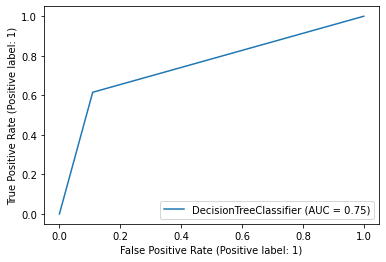

In [58]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(clf,xtest,ytest)
